In [1]:
from keras.datasets import cifar10
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from keras.utils import to_categorical
import numpy as np

In [2]:
BATCH_SIZE = 32
OPTIMIZER = 'RMSprop'
EPOCHS = 25
LOSS = 'categorical_crossentropy'
DR = 0.5

In [40]:
(x_train, y_train), (x_val, y_val) = cifar10.load_data()
x_train = x_train.astype('float32')/255.0
x_val = x_val.astype('float32')/255.0

In [41]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

# **Model 1**

In [5]:
def plot_curves(history):
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2 ,1)
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(["Train loss", "Val loss"])
    plt.subplot(1, 2, 2)
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend(["Train Accuracy", "Val Accuracy"])
    plt.show()


def model1(size, trainable=True):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (size, size), activation='relu', input_shape=(32, 32, 3), trainable=trainable))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu', trainable=trainable))
    model.add(layers.Dense(2, activation='softmax'))

    model.compile(optimizer=OPTIMIZER,loss=LOSS,metrics=['accuracy'])
    
    return model

In [42]:
idx0, idx1 = (y_train==0).squeeze(-1), (y_train==1).squeeze(-1)
x_train_0 = x_train[idx0]
x_train_1 = x_train[idx1]

y_train_0 = y_train[idx0]
y_train_1 = y_train[idx1]

idx0, idx1 = (y_val==0).squeeze(-1), (y_val==1).squeeze(-1)
x_val_0 = x_val[idx0]
x_val_1 = x_val[idx1]

y_val_0 = y_val[idx0]
y_val_1 = y_val[idx1]

### **Visualising example images for binary classification**

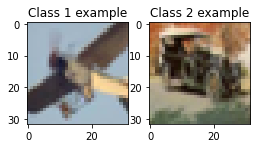

In [7]:
plt.figure(figsize=(4, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_train_0[42])
plt.title("Class 1 example")
plt.subplot(1, 2, 2)
plt.imshow(x_train_1[42])
plt.title("Class 2 example")
plt.show()

In [43]:
x_train_new = np.concatenate((x_train_0, x_train_1))
x_val_new = np.concatenate((x_val_0, x_val_1))

y_train_new = np.concatenate((y_train_0, y_train_1))
y_val_new = np.concatenate((y_val_0, y_val_1))

print("Printing shapes : ", x_train_new.shape, y_train_new.shape, x_val_new.shape, y_val_new.shape)

sh1 = x_train_new.shape[0]
sh2 = x_val_new.shape[0]

idx1 = np.arange(sh1, dtype=np.int32)
idx2 = np.arange(sh2, dtype=np.int32)

np.random.shuffle(idx1)
np.random.shuffle(idx2)

x_train_new = x_train_new[idx1]
y_train_new = y_train_new[idx1]

x_val_new = x_val_new[idx2]
y_val_new = y_val_new[idx2]

y_train_new = to_categorical(y_train_new)
y_val_new = to_categorical(y_val_new)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

Printing shapes :  (10000, 32, 32, 3) (10000, 1) (2000, 32, 32, 3) (2000, 1)




Model 1(1x1 filter) summary is 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 4,195,970
Trainable params: 4,195,970
Non-trainable params: 0
_________________________________________________________________
None


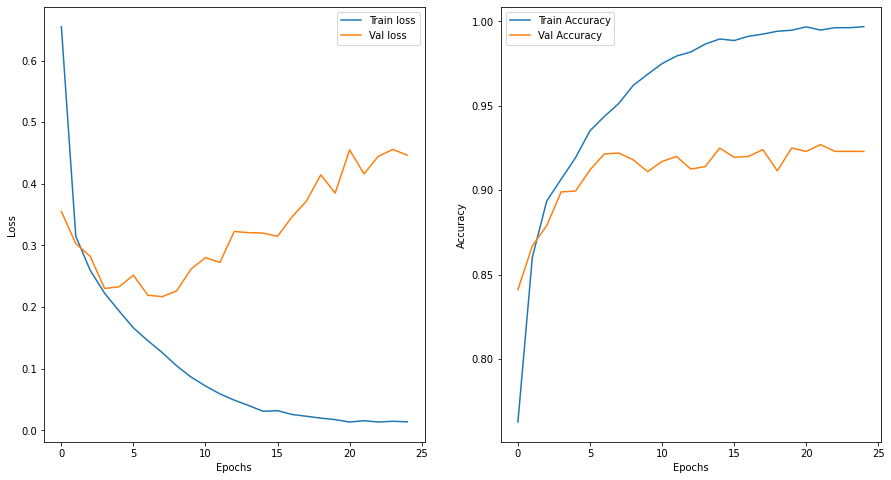

Max validation set accuracy :  0.9269999861717224


In [9]:
m1 = model1(1)
m2 = model1(3)
m3 = model1(5)

print("\n\nModel 1(1x1 filter) summary is \n")
print(m1.summary())
hist_m1 = m1.fit(x_train_new, y_train_new, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0, validation_data=(x_val_new, y_val_new))
plot_curves(hist_m1)
print("Max validation set accuracy : ", max(hist_m1.history["val_accuracy"]))



Model 2(3x3 filter) summary is 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               3686912   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 1026      
Total params: 3,688,834
Trainable params: 3,688,834
Non-trainable params: 0
_________________________________________________________________
None


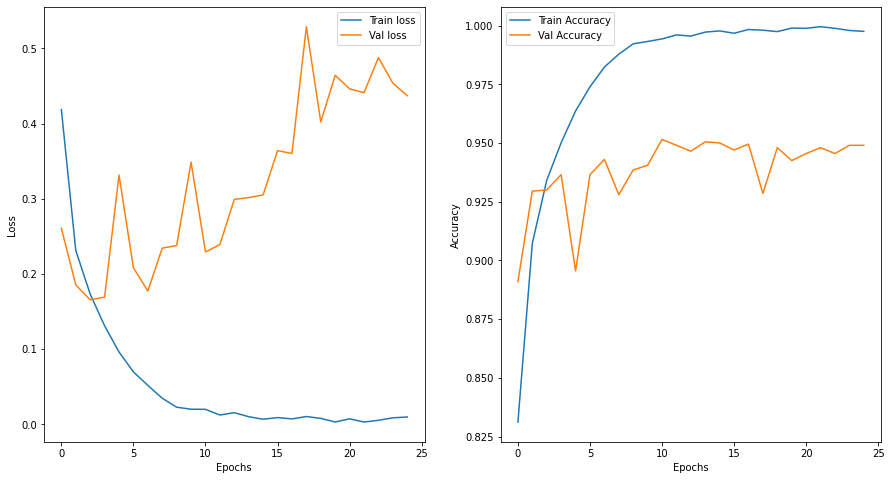

Max validation set accuracy :  0.9514999985694885


In [10]:
print("\n\nModel 2(3x3 filter) summary is \n")
print(m2.summary())
hist_m2 = m2.fit(x_train_new, y_train_new, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0, validation_data=(x_val_new, y_val_new))
plot_curves(hist_m2)

print("Max validation set accuracy : ", max(hist_m2.history["val_accuracy"]))

### **Comments**
* Smaller filter size is giving bit better results. 
* Smallest size of 1x1 is exception for point above. (This is giving lower accuracy because 1x1 filter do not take into account neighbourhood information at all.)




Model 5(5x5 filter) summary is 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 1026      
Total params: 3,215,234
Trainable params: 3,215,234
Non-trainable params: 0
_________________________________________________________________
None


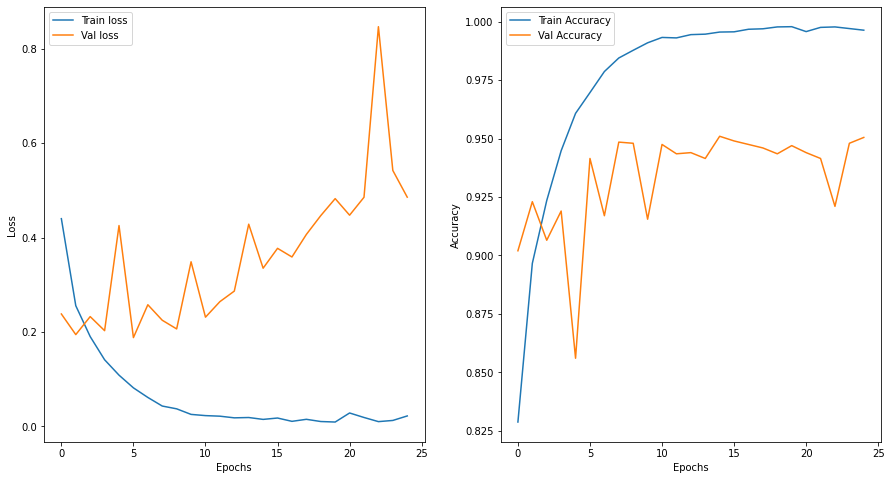

Max validation set accuracy :  0.9509999752044678


In [ ]:
print("\n\nModel 5(5x5 filter) summary is \n")
print(m3.summary())
hist_m3 = m3.fit(x_train_new, y_train_new, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0, validation_data=(x_val_new, y_val_new))
plot_curves(hist_m3)

print("Max validation set accuracy : ", max(hist_m3.history["val_accuracy"]))

# **Model 2**

In [ ]:
def model2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(DR))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))

    model.compile('RMSProp',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)              

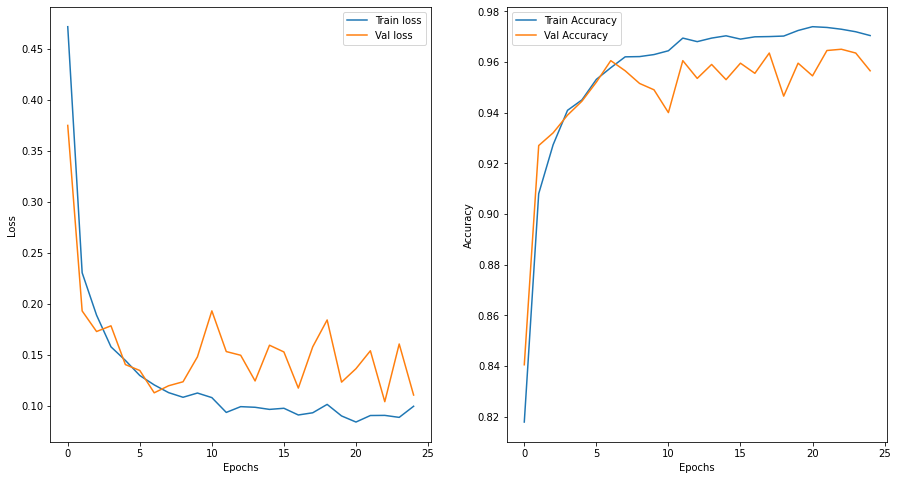


Max validation set accuracy :  0.9649999737739563


In [ ]:
m2_1 = model2()
print(m2_1.summary())
hist_m2_1 = m2_1.fit(x_train_new, y_train_new, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0, validation_data=(x_val_new, y_val_new))
plot_curves(hist_m2_1)

print("\nMax validation set accuracy : ", max(hist_m2_1.history["val_accuracy"]))

### **Comments**

* A very good accuracy of 96% is observed on validation data. 
* Adding more convolution layers and convolutional filters is able to produce better results.
* More filters = more ability to extract important features.

# **Model 3**

In [51]:
def model3():
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512,activation='relu'))
    model.add(layers.Dense(8192,activation='relu'))
    model.add(layers.Reshape((16,16,32)))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(3,(3,3),activation='sigmoid',padding='same'))
    model.compile('RMSProp',loss='mse',metrics=['mse'])
    return model

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_49 (Dense)             (None, 8192)              4202496   
_________________________________________________________________
reshape_5 (Reshape)          (None, 16, 16, 32)        0         
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 32, 32, 32)      

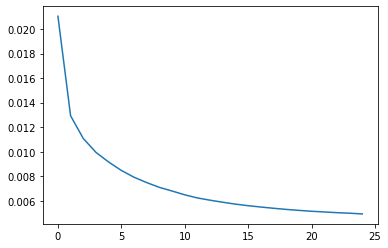

In [52]:
m3_1 = model3()

print(m3_1.summary())
hist_m3_1 = m3_1.fit(x_train, x_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0, validation_data=(x_val, x_val))

plt.figure()
plt.plot(hist_m3_1.history["mse"])
plt.show()

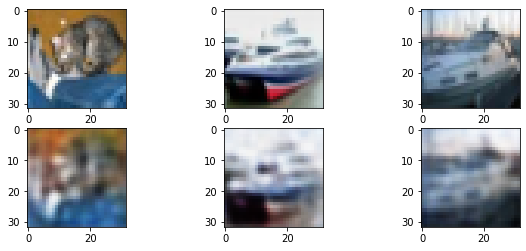

In [54]:
imgs = m3_1.predict(x_val)
plt.figure(figsize=(10, 4))
n = 3
for i in range(n):
    plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i].reshape(32, 32,3))
    plt.subplot(2, n, i+1+n)
    plt.imshow(imgs[i].reshape(32, 32,3))
plt.show()

### **Comments**

* MSE is very good. 
* Generated images are not perceptually good. 
* Generated images are blurred.

* **Conclusion :** Lower MSE does not mean good results. We might be able to model a better loss function for autoencoders, that helps it generate perceptually good and apealing results. 

# **Model 4**

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               3686912   
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 1026      
Total params: 3,688,834
Trainable params: 1,026
Non-trainable params: 3,687,808
_________________________________________________________________
None


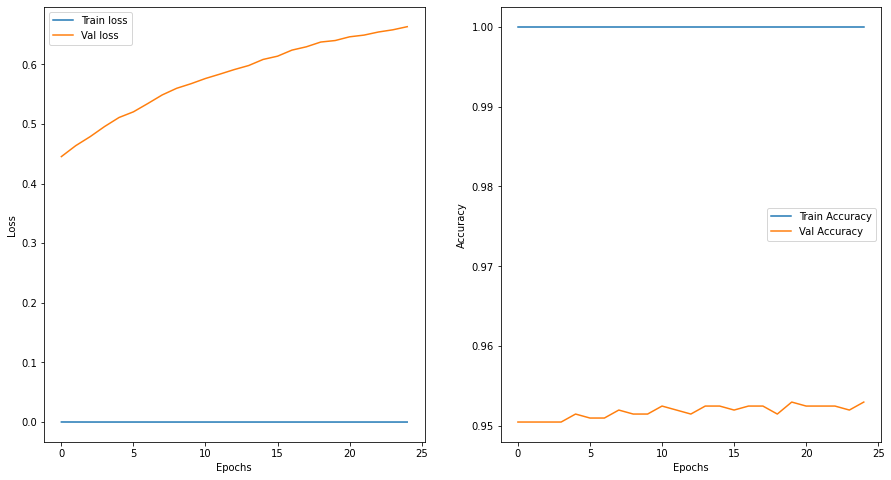

Max Validation set accuracy is :  0.953000009059906


In [12]:
def model4(weights):
    model = model1(3, False)
    model.set_weights(weights)
    return model

weights = m2.get_weights()
m4_1 = model4(weights)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6)

print(m4_1.summary())
hist_m4 = m4_1.fit(x_train_new, y_train_new, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0, validation_data=(x_val_new, y_val_new), callbacks=callback)
plot_curves(hist_m4)  

print("Max Validation set accuracy is : ", max(hist_m4.history["val_accuracy"]))

### **Comments**

* Case of retraining the model. 
* As the model is already trained, training accuracy approaches very close to 1 (overfit)
* Validation accuracy improve a little bit because of further training.

# **Model 5**

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_28 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dense_59 (Dense)             (None, 8192)              4202496   
_________________________________________________________________
reshape_8 (Reshape)          (None, 16, 16, 32)        0         
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 32, 32, 32)      

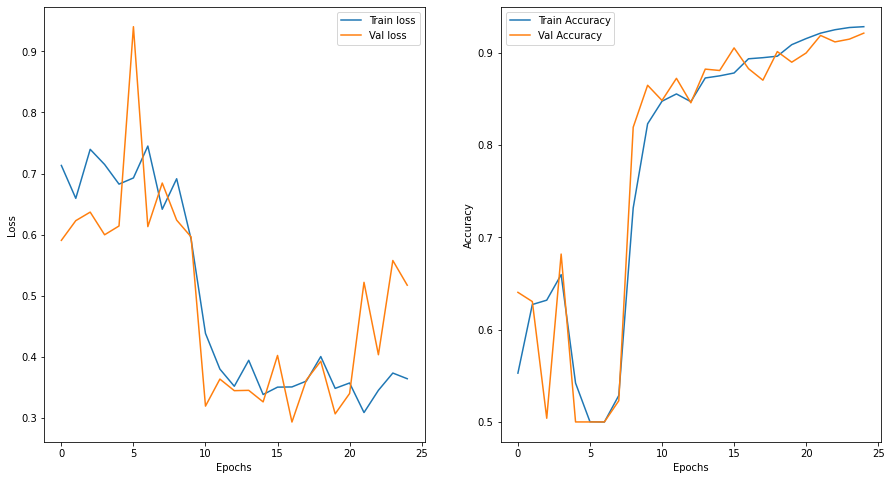

Max validation set accuracy :  0.921500027179718


In [56]:
def model5(weights):
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=(32,32,3),trainable=False))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512,activation='relu'))
    model.add(layers.Dense(8192,activation='relu'))
    model.add(layers.Reshape((16,16,32)))
    model.add(layers.UpSampling2D((2, 2)))
    model.add(layers.Conv2D(3,(3,3),activation='tanh',padding='same',trainable=False))
    model.set_weights(weights)
    model.add(layers.Flatten())
    model.add(layers.Dense(512,activation='relu'))
    model.add(layers.Dense(2,activation='sigmoid'))

    model.compile('RMSProp',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

weights = m3_1.get_weights()

m5_1 = model5(weights)
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=6)
print(m5_1.summary())
hist_m5 = m5_1.fit(x_train_new, y_train_new, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0, validation_data=(x_val_new, y_val_new))
plot_curves(hist_m5)

print("Max validation set accuracy : ", max(hist_m5.history["val_accuracy"]))

### **Comments**
* Here we can clearly see the a bit low accuracy in the results (compared to results in model 1 and model 2).
* The reason for a bit lower performance is due to classification on images generated by autoencoder rather than original images. 
* We observed that images generated by autoencoder are not perceptually good. So, accordingly, performance also degraded a bit.


# **Model 6**

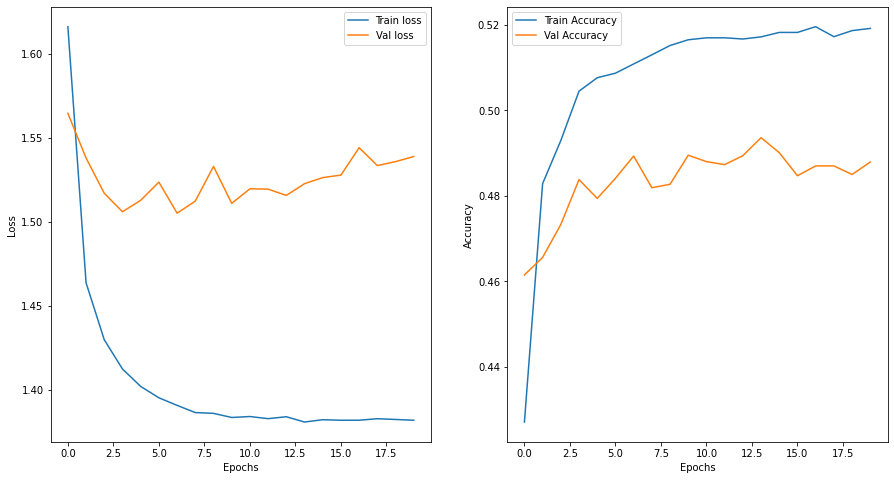

Max validation set accuracy :  0.4936000108718872


In [44]:
def model6(weights):
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3), trainable=False))
    model.add(layers.MaxPooling2D((2, 2))) 
    model.add(layers.Flatten())
    model.add(layers.Dense(512,activation='relu',trainable=False))
    model.set_weights(weights[0:len(weights)-2])
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model

weights = m4_1.get_weights()

m6_1 = model6(weights)
hist_m6 = m6_1.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=0, validation_data=(x_val, y_val), callbacks=callback)
plot_curves(hist_m6)

print("Max validation set accuracy : ", max(hist_m6.history["val_accuracy"]))

### **Comments**

* Since the model is trained on binary classification, it is performing poor on 10 class classification. 
* Here we are using weights from model trained on two classes, and then tuning that model on 10 class classification by training last dense layers. 
* This is why the results are bit poor. 

# **Best model**

In [77]:
def get_best_1():
    model = models.Sequential()
    model.add(Conv2D(64, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))    
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(256, (3,3), padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(256, (3,3), padding='same',activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile('adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

In [79]:
model = get_best_1()
hist = model.fit(x_train, y_train, epochs=50, batch_size=BATCH_SIZE, validation_data=(x_val, y_val))

Epoch 1/50
1563/1563 [==============================] - 39s 25ms/step - loss: 1.6237 - accuracy: 0.4352 - val_loss: 1.1849 - val_accuracy: 0.5748
Epoch 2/50
1563/1563 [==============================] - 39s 25ms/step - loss: 1.1383 - accuracy: 0.6048 - val_loss: 1.0160 - val_accuracy: 0.6570
Epoch 3/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9754 - accuracy: 0.6722 - val_loss: 0.8366 - val_accuracy: 0.7204
Epoch 4/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.8467 - accuracy: 0.7166 - val_loss: 0.7567 - val_accuracy: 0.7471
Epoch 5/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.7526 - accuracy: 0.7508 - val_loss: 0.7157 - val_accuracy: 0.7636
Epoch 6/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6866 - accuracy: 0.7740 - val_loss: 0.5943 - val_accuracy: 0.8023
Epoch 7/50
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6148 - accuracy: 0.7966 - val_loss: 0.7139 -

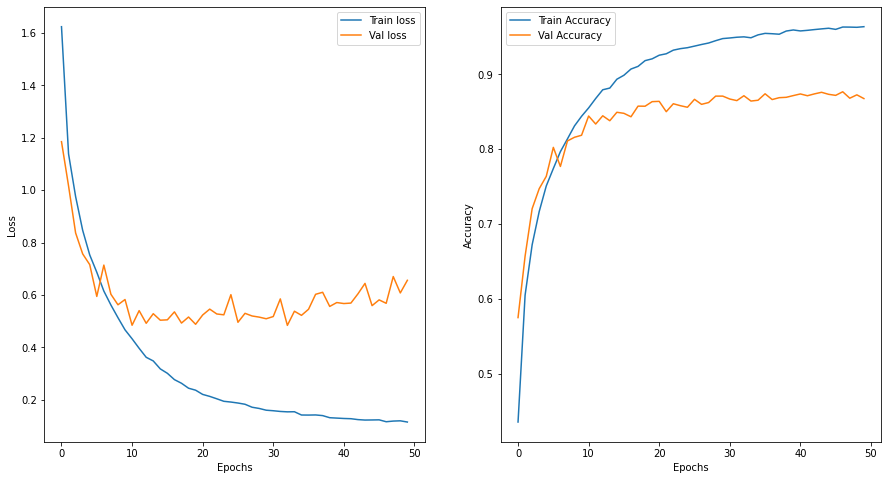

Max validation accuracy observed is :  0.8766000270843506


In [81]:
plot_curves(hist)
print("Max validation accuracy observed is : ", max(hist.history["val_accuracy"]))